In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Lectura de los datos en formato csv dondese almacenaron los promedios de los sensores. Tenemos un dataframe de 2 columnas una por cada sensor y un total de 1427 filas

In [23]:
df = pd.read_csv("Promedios.csv")
df.head()

,DS18B20,LM35
0,0.00,0
1,0.00,0
2,0.00,0
3,4.41,1185
4,4.36,1156


Preprocesamiento de los datos.
Esta parte elimina ceros, reindexa el dataframe y da el mismo tipo de dato a toda la información (float)

In [24]:
df["LM35"]=df["LM35"].astype("float")
df.dtypes

DS18B20    float64
LM35       float64
dtype: object

In [25]:
df = df.loc[(df!=0).any(1)]

In [26]:
df = df.reset_index()
df = df[['LM35','DS18B20']]
df

,LM35,DS18B20
0,1185.0,4.41
1,1156.0,4.36
2,1127.0,4.31
3,1101.0,4.31
4,1078.0,4.29
...,...,...
1416,844.0,28.56
1417,844.0,28.54
1418,843.0,28.56
1419,843.0,28.56


En esta descripción podemos ver cual es el mayor y menor datos de cada fila, además de otros estadísiticos.

In [27]:
df.describe()

,LM35,DS18B20
count,1421.000000,1421.000000
mean,1039.607319,35.764645
std,491.538931,19.579258
min,191.000000,3.500000
25%,864.000000,29.250000
50%,955.000000,32.590000
75%,1228.000000,43.500000
max,2323.000000,85.540000


Graficamos la totalidad de datos del LM35, las líneas horizontales son para diferenciar las 3 etapas en el proceso de muestreo

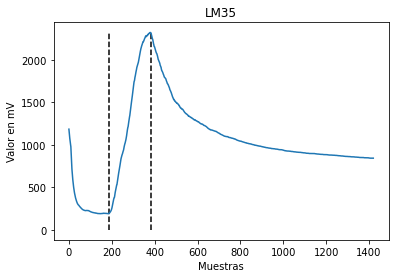

In [28]:
plt.plot(range(1421),df["LM35"])
plt.vlines(x=189, ymin=0, ymax=2325,colors='black',linestyles='dashed')
plt.vlines(x=385, ymin=0, ymax=2325,colors='black',linestyles='dashed')
plt.xlabel("Muestras")
plt.ylabel("Valor en mV")
plt.title('LM35')
plt.show()

Buevamente graficamos la totalidad de datos del DS18B20, las líneas horizontales son para diferenciar las 3 etapas en el proceso de muestreo

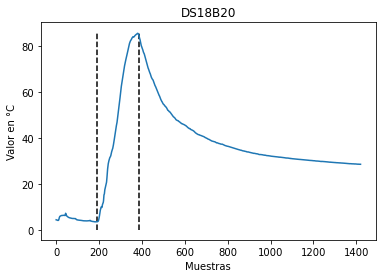

In [100]:
plt.plot(range(1421),df["DS18B20"])
plt.vlines(x=189, ymin=0, ymax=86,colors='black',linestyles='dashed')
plt.vlines(x=385, ymin=0, ymax=86,colors='black',linestyles='dashed')
plt.xlabel("Muestras")
plt.ylabel("Valor en °C")
plt.title('DS18B20')
plt.show()

Podemos ver que ambas gráficas son similares en forma

In [39]:
df[df["DS18B20"]==85.54]

,LM35,DS18B20
380,2320.0,85.54


## Visualización de la primera etapa, etapa de estabilización

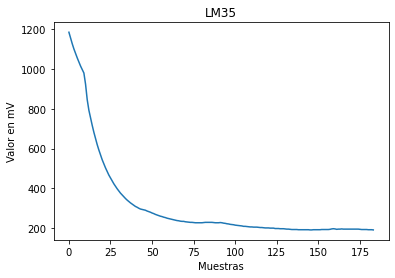

In [35]:
plt.plot(range(184),df["LM35"][:184])
plt.xlabel("Muestras")
plt.ylabel("Valor en mV")
plt.title('LM35')
plt.show()

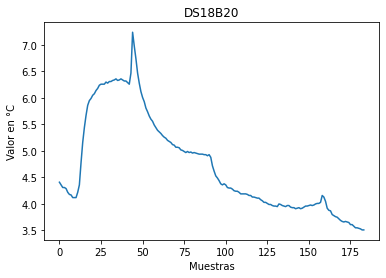

In [38]:
plt.plot(range(184),df["DS18B20"][:184])
plt.xlabel("Muestras")
plt.ylabel("Valor en °C")
plt.title('DS18B20')
plt.show()

## Visualización de la segunda etapa, aumento de temperatura

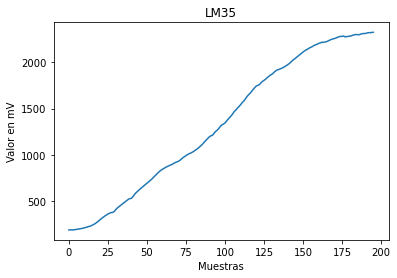

In [42]:
plt.plot(range(196),df["LM35"][184:380])
plt.xlabel("Muestras")
plt.ylabel("Valor en mV")
plt.title('LM35')
plt.show()

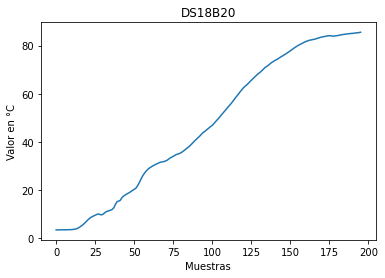

In [40]:
plt.plot(range(196),df["DS18B20"][184:380])
plt.xlabel("Muestras")
plt.ylabel("Valor en °C")
plt.title('DS18B20')
plt.show()

## Visualización de la tercera etapa, etapa de bajada de temperatura

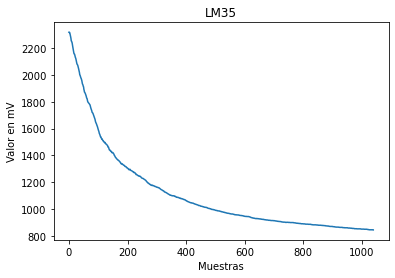

In [101]:
plt.plot(range(1040),df["LM35"][380:1420])
plt.xlabel("Muestras")
plt.ylabel("Valor en mV")
plt.title('LM35')
plt.show()

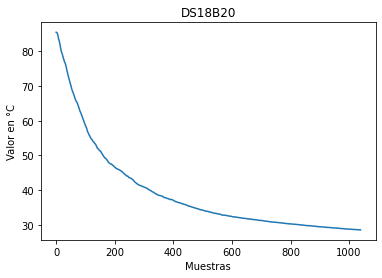

In [102]:
plt.plot(range(1040),df["DS18B20"][380:1420])
plt.xlabel("Muestras")
plt.ylabel("Valor en °C")
plt.title('DS18B20')
plt.show()

In [46]:
df["mV"]=df["LM35"]/(3*df["DS18B20"])

In [47]:
df

,LM35,DS18B20,mV
0,1185.0,4.41,89.569161
1,1156.0,4.36,88.379205
2,1127.0,4.31,87.161640
3,1101.0,4.31,85.150812
4,1078.0,4.29,83.760684
...,...,...,...
1416,844.0,28.56,9.850607
1417,844.0,28.54,9.857510
1418,843.0,28.56,9.838936
1419,843.0,28.56,9.838936


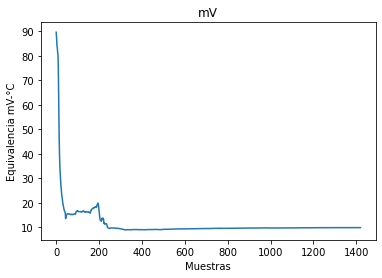

In [50]:
plt.plot(range(1421),df["mV-°C"])
plt.xlabel("Muestras")
plt.ylabel("Equivalencia mV-°C")
plt.title('mV')
plt.show()

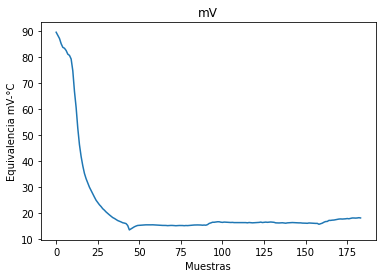

In [51]:
plt.plot(range(184),df["mV"][:184])
plt.xlabel("Muestras")
plt.ylabel("Equivalencia mV-°C")
plt.title('mV')
plt.show()

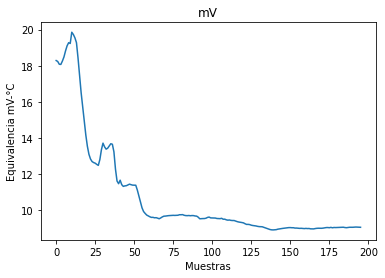

In [56]:
plt.plot(range(196),df["mV"][184:380])
plt.xlabel("Muestras")
plt.ylabel("Equivalencia mV-°C")
plt.title('mV')
plt.show()

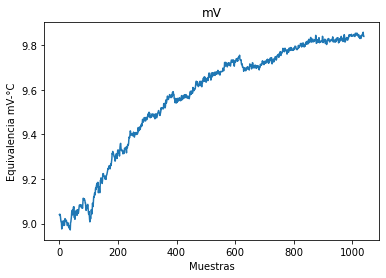

In [54]:
plt.plot(range(1040),df["mV"][380:1420])
plt.xlabel("Muestras")
plt.ylabel("Equivalencia mV-°C")
plt.title('mV')
plt.show()

## Comparativa uno a uno para calibración

Graficamos cada etapa por separado para poder visualizar la línea de muestreo en cada caso particular. Esta primera es para cuando disminuye la temperatura

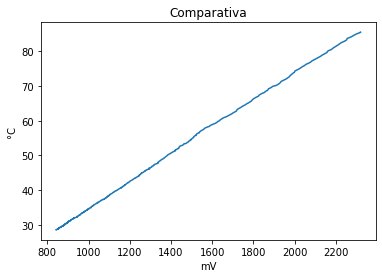

In [58]:
plt.plot(df["LM35"][380:1420],df["DS18B20"][380:1420])
plt.xlabel("mV")
plt.ylabel("°C")
plt.title('Comparativa')
plt.show()

Aqui tenemos lo mismo pero para el caso en el que va en aumento la temperatura

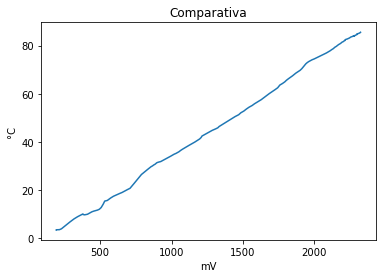

In [60]:
plt.plot(df["LM35"][184:380],df["DS18B20"][184:380])
plt.xlabel("mV")
plt.ylabel("°C")
plt.title('Comparativa')
plt.show()

# Regresión lineal

El comportamiento de ambos sensors puede ser descrito por medio de ecuaciones de la recta, para hallar la recta que mejor se ajusta a cada comportamiento generaremos 2 modelos realizando un entrenamiento por regresión lineal para hallar los valores del coeficiente e intercepto de los modelos con mejor ajuste

Cargamos la librería de regresión lineal

In [61]:
from sklearn.linear_model import LinearRegression

### Modelo para la subida de temperatura

Separamos unicamente la información de subida en un arreglo para calcular el modelo solo de esta parte

In [ ]:
LM35_subida = np.array(df["LM35"][184:380])
LM35_subida= LM35_subida.reshape(-1,1)

In [79]:
model = LinearRegression()
model.fit(LM35_subida,  df["DS18B20"][184:380])

LinearRegression()

Obtenemos los valores del intercepto y coeficiente

In [80]:
model.intercept_, model.coef_

(-5.203417248688879, array([0.03924601]))

Esta esuna línea de predicción para generar el modelo de la recta para esta ecuación resultante

In [87]:
x_predict = np.linspace(200,2323,2123)
y_predict_subida = -5.203417248688879 + 0.03924601*x_predict

Graficamos

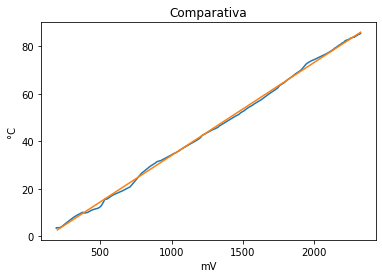

In [90]:
plt.plot(df["LM35"][184:380],df["DS18B20"][184:380])
plt.plot(x_predict,y_predict_subida)
plt.xlabel("mV")
plt.ylabel("°C")
plt.title('Comparativa')
plt.show()

### Modelo para el descenso de temperatura

Separamos los datos unicamente de temperatura en descenso

In [91]:
LM35_subida = np.array(df["LM35"][380:1420])
LM35_subida= LM35_subida.reshape(-1,1)

In [92]:
model2 = LinearRegression()
model2.fit(LM35_subida,  df["DS18B20"][380:1420])

LinearRegression()

Obtenemos los valores del coeficiente e intercepto

In [93]:
model2.intercept_, model2.coef_

(-4.646683808821855, array([0.03931485]))

Valores de predicción para generar el modelo

In [98]:
x_predict = np.linspace(840,2323,2123)
y_predict_subida = -4.646683808821855 + 0.03931485*x_predict

Graficamos

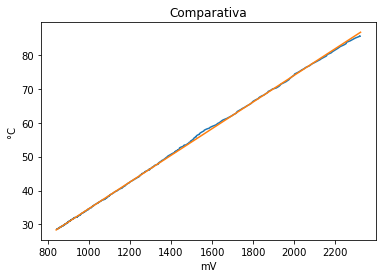

In [106]:
plt.plot(df["LM35"][380:1420],df["DS18B20"][380:1420])
plt.plot(x_predict,y_predict_subida)
plt.xlabel("mV")
plt.ylabel("°C")
plt.title('Comparativa')
plt.show()

Ojo estos valores de ajuste son de los las mediciones del LM35 despues de pasar por una etapa de filtrado y amplificación si podríamos intentar aproximar los valores a las lecturas del sensor LM35 directas pero las etapas de preprocesamiento de la señal carecerían de sentido.

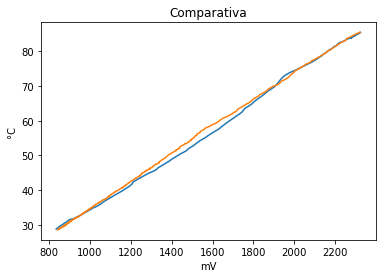

In [131]:
plt.plot(df["LM35"][243:380],df["DS18B20"][243:380])
plt.plot(df["LM35"][380:1420],df["DS18B20"][380:1420])
plt.xlabel("mV")
plt.ylabel("°C")
plt.title('Comparativa')
plt.show()

In [127]:
LM35_subida = np.array(df["LM35"][243:1420])
LM35_subida= LM35_subida.reshape(-1,1)

In [128]:
model3 = LinearRegression()
model3.fit(LM35_subida,  df["DS18B20"][243:1420])

LinearRegression()

In [129]:
model2.intercept_, model2.coef_

(-4.646683808821855, array([0.03931485]))

In [133]:
x_predict = np.linspace(840,2323,2123)
y_predict_subida = -4.646683808821855 + 0.03931485*x_predict

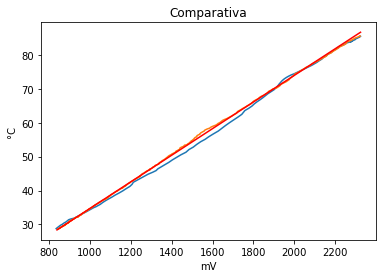

In [141]:
plt.plot(df["LM35"][243:380],df["DS18B20"][243:380])
plt.plot(df["LM35"][380:1420],df["DS18B20"][380:1420])
plt.plot(x_predict,y_predict_subida,'r-')
plt.xlabel("mV")
plt.ylabel("°C")
plt.title('Comparativa')
plt.show()